**Importing Libraries and Files**

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df = pd.read_csv("pr_core_dev.csv")

In [3]:
df.shape

(569448, 11)

In [4]:
df.columns

Index(['project_name', 'dev_name', 'created_at', 'updated_at', 'closed_at',
       'merged_at', 'pr_status', 'project_id', 'project_status', 'alias_id',
       'Core_Developer'],
      dtype='object')

In [6]:
# Check if a column contains NaN
has_nan = df['project_name'].isna().any()

print(has_nan) 

False


In [ ]:
# p=df[['project_status','Core_Developer']]
# p.to_csv("check.csv",index=False)

In [8]:
df

,project_name,dev_name,created_at,updated_at,closed_at,merged_at,pr_status,project_id,project_status,alias_id,Core_Developer
0,abdera,dargooo,2020-11-26 21:21:33+00:00,2023-05-21 04:37:38+00:00,2023-05-21 04:37:38+00:00,NaN,Closed,49.0,1,NaN,No
1,abdera,YYTVicky,2020-03-01 00:37:56+00:00,2020-04-30 02:01:45+00:00,NaN,NaN,Open,49.0,1,NaN,No
2,abdera,nicolasyanncouturier,2013-10-18 13:32:37+00:00,2014-07-16 01:44:57+00:00,NaN,NaN,Open,49.0,1,NaN,No
3,abdera,nicolasyanncouturier,2013-10-14 12:23:03+00:00,2014-07-13 19:17:32+00:00,NaN,NaN,Open,49.0,1,NaN,No
4,accumulo,dlmarion,2023-12-06 14:20:37+00:00,2024-07-12 00:15:54+00:00,2023-12-06 14:34:06+00:00,2023-12-06 14:34:06+00:00,Merged,50.0,1,340.0,No
...,...,...,...,...,...,...,...,...,...,...,...
569443,zipkin,shakuzen,2019-02-01 09:58:52+00:00,2019-02-04 03:34:15+00:00,2019-02-02 09:01:02+00:00,2019-02-02 09:01:01+00:00,Merged,312.0,2,NaN,No
569444,zipkin,codefromthecrypt,2019-02-01 09:12:47+00:00,2019-02-18 06:44:53+00:00,2019-02-18 06:44:51+00:00,NaN,Closed,312.0,2,NaN,No
569445,zipkin,codefromthecrypt,2019-02-01 08:55:20+00:00,2019-02-01 09:51:36+00:00,2019-02-01 09:51:34+00:00,2019-02-01 09:51:34+00:00,Merged,312.0,2,NaN,No
569446,zipkin,codefromthecrypt,2019-02-01 08:17:38+00:00,2019-02-01 08:58:12+00:00,2019-02-01 08:58:10+00:00,2019-02-01 08:58:10+00:00,Merged,312.0,2,NaN,No


In [10]:
# Determining Unique values and counts in a column
unique_values = df['project_name'].unique()
print(unique_values)
print(unique_values.size)

['abdera' 'accumulo' 'ace' 'activemq' 'activemq-apollo' 'airavata'
 'airflow' 'allura' 'ambari' 'ant-easyant-core' 'ant-ivy' 'any23'
 'apex-core' 'aries' 'asterixdb' 'atlas' 'aurora' 'beam' 'bigtop'
 'bloodhound' 'brooklyn' 'buildr' 'bval' 'calcite' 'carbondata'
 'cassandra' 'cayenne' 'celix' 'chukwa' 'clerezza' 'climate' 'cloudstack'
 'commons-ognl' 'cordova' 'couchdb' 'creadur-rat' 'crunch' 'ctakes'
 'curator' 'cxf' 'datafu' 'db-jdo' 'deltacloud' 'deltaspike' 'derby'
 'directmemory' 'directory-server' 'distributedlog' 'drill' 'dubbo'
 'eagle' 'empire-db' 'esme' 'falcon' 'felix' 'fineract' 'flex-sdk' 'flink'
 'flume' 'fluo' 'freemarker' 'ftpserver' 'geode' 'geronimo'
 'geronimo-yoko' 'giraph' 'gora' 'griffin' 'groovy' 'guacamole-client'
 'hama' 'hawq' 'hcatalog' 'helix' 'ignite' 'impala' 'amaterasu'
 'annotator' 'ariatosca' 'batchee' 'brpc' 'crail' 'daffodil'
 'datasketches' 'dlab' 'dolphinscheduler' 'doris' 'druid' 'echarts'
 'edgent' 'flagon' 'gobblin' 'heron' 'hivemall' 'hudi' 'ice

In [11]:
# Check if a column contains NaN
has_nan = df['alias_id'].isna().any()

print(has_nan)  # Output: True

True


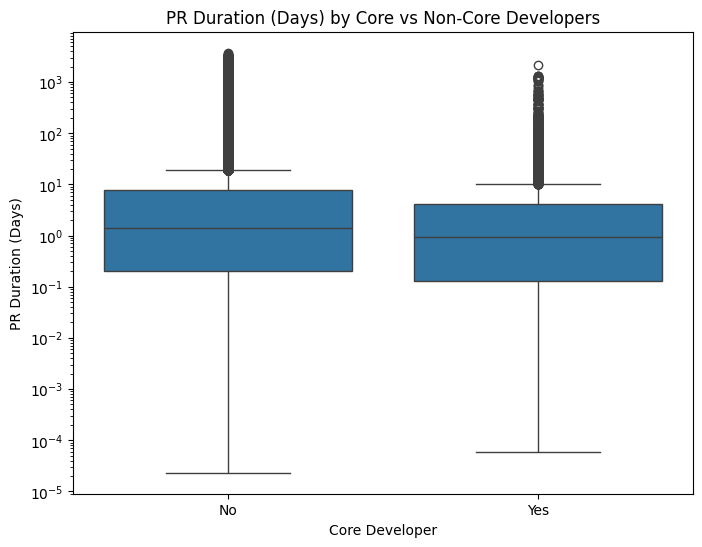

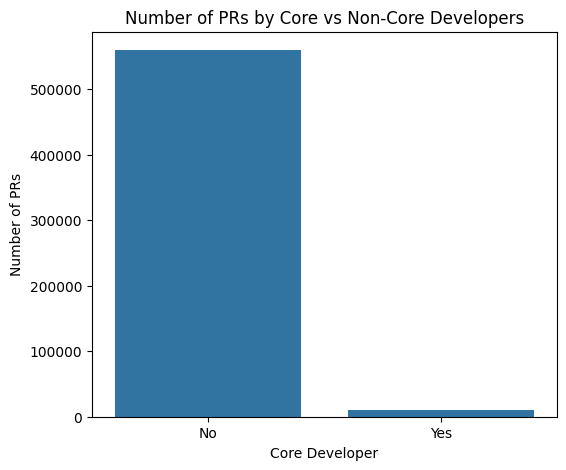

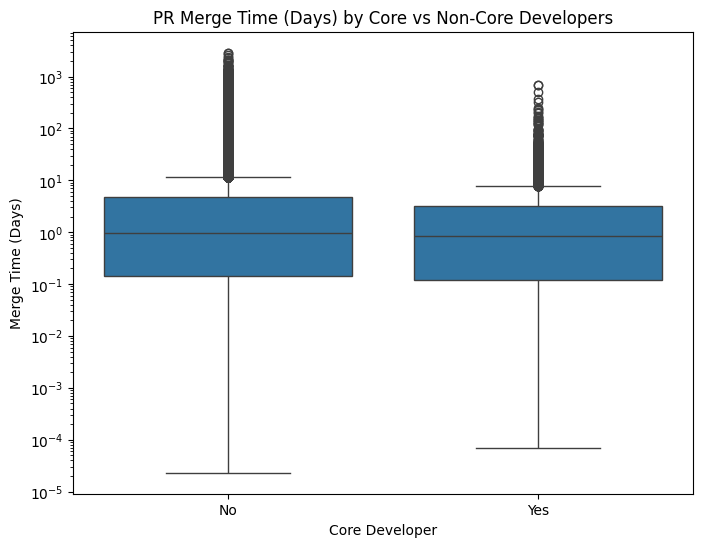

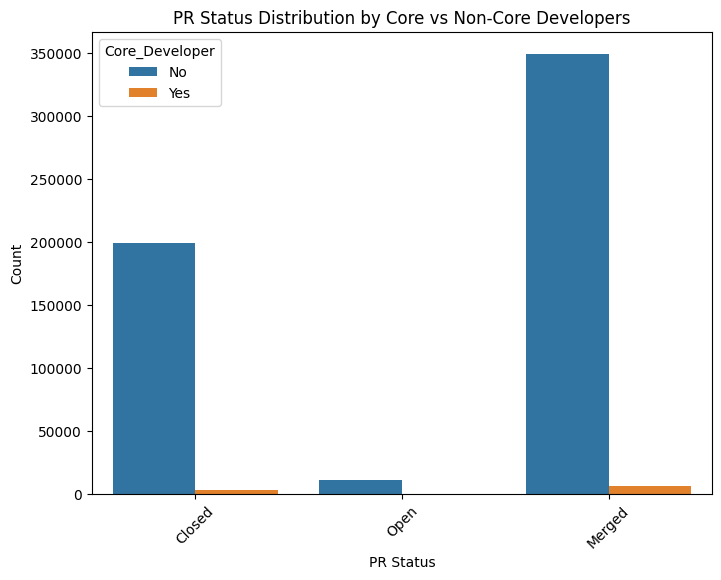

In [45]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Convert datetime columns
df['created_at'] = pd.to_datetime(df['created_at'])
df['closed_at'] = pd.to_datetime(df['closed_at'])
df['merged_at'] = pd.to_datetime(df['merged_at'])

# Calculate PR duration (closed - created)
df['pr_duration'] = (df['closed_at'] - df['created_at']).dt.total_seconds() / (60 * 60 * 24)  # in days
df['merge_time'] = (df['merged_at'] - df['created_at']).dt.total_seconds() / (60 * 60 * 24)  # in days

# Boxplot for PR duration by core vs non-core developers
plt.figure(figsize=(8, 6))
sns.boxplot(x='Core_Developer', y='pr_duration', data=df)
plt.title('PR Duration (Days) by Core vs Non-Core Developers')
plt.xlabel('Core Developer')
plt.ylabel('PR Duration (Days)')
plt.yscale('log')  # If values are skewed
plt.show()

# Bar plot for number of PRs by core vs non-core developers
plt.figure(figsize=(6, 5))
sns.countplot(x='Core_Developer', data=df)
plt.title('Number of PRs by Core vs Non-Core Developers')
plt.xlabel('Core Developer')
plt.ylabel('Number of PRs')
plt.show()

# Boxplot for PR merge time by core vs non-core developers
plt.figure(figsize=(8, 6))
sns.boxplot(x='Core_Developer', y='merge_time', data=df)
plt.title('PR Merge Time (Days) by Core vs Non-Core Developers')
plt.xlabel('Core Developer')
plt.ylabel('Merge Time (Days)')
plt.yscale('log')  # If necessary
plt.show()

# PR status distribution by Core vs Non-Core Developers
plt.figure(figsize=(8, 6))
sns.countplot(x='pr_status', hue='Core_Developer', data=df)
plt.title('PR Status Distribution by Core vs Non-Core Developers')
plt.xlabel('PR Status')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.show()


In [6]:
# Count the number of unique project_ids for each project_status
project_status_counts = df.groupby('project_status')['project_id'].nunique()

# Display the results
print(project_status_counts)

project_status
0     46
1    180
2     26
Name: project_id, dtype: int64


**Total number of Pull Requests by Core and Non-Core Developers**

In [7]:
# Total number of pull requests
total_prs = len(df)

# Number of PRs by core developers
core_prs = df[df['Core_Developer'] == 'Yes'].shape[0]

# Number of PRs by non-core developers
non_core_prs = df[df['Core_Developer'] == 'No'].shape[0]

# Display results
print(f"Total PRs: {total_prs}")
print(f"PRs by Core Developers: {core_prs}")
print(f"PRs by Non-Core Developers: {non_core_prs}")

Total PRs: 569448
PRs by Core Developers: 10043
PRs by Non-Core Developers: 559405


/tmp/ipykernel_285167/1832499561.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=core_counts.index, y=core_counts.values, palette=['blue', 'orange'])


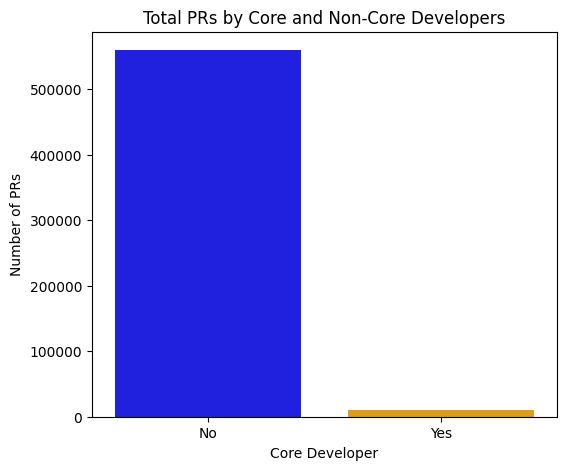

In [8]:
# Count PRs by Core and Non-Core Developers
core_counts = df['Core_Developer'].value_counts()

# Bar plot
plt.figure(figsize=(6, 5))
sns.barplot(x=core_counts.index, y=core_counts.values, palette=['blue', 'orange'])
plt.title('Total PRs by Core and Non-Core Developers')
plt.xlabel('Core Developer')
plt.ylabel('Number of PRs')
plt.show()

**No. of Core and Non-core developer PRs per project**

In [9]:
most_common_value = df['project_id'].value_counts().idxmax()  # Most frequent value
most_common_count = df['project_id'].value_counts().max()  # Count of most frequent value

print(f"Most common value: {most_common_value}")
print(f"Count: {most_common_count}")

Most common value: 216.0
Count: 49822


In [49]:
# Group by project_id and Core_Developer status, then count PRs
pr_counts_per_project = df.groupby(['project_id', 'Core_Developer']).size().unstack(fill_value=0)

# Rename columns for clarity
pr_counts_per_project.columns = ['Non-Core PRs', 'Core PRs']

# Reset index to make it more readable
pr_counts_per_project = pr_counts_per_project.reset_index()

# Display result
print(pr_counts_per_project)

     project_id  Non-Core PRs  Core PRs
0           1.0            62         0
1           2.0            87         0
2           3.0            20         0
3           4.0          1092         0
4           5.0            88         0
..          ...           ...       ...
247       302.0             2         0
248       306.0            27         0
249       310.0             2         0
250       311.0             4         0
251       312.0          2397         0

[252 rows x 3 columns]


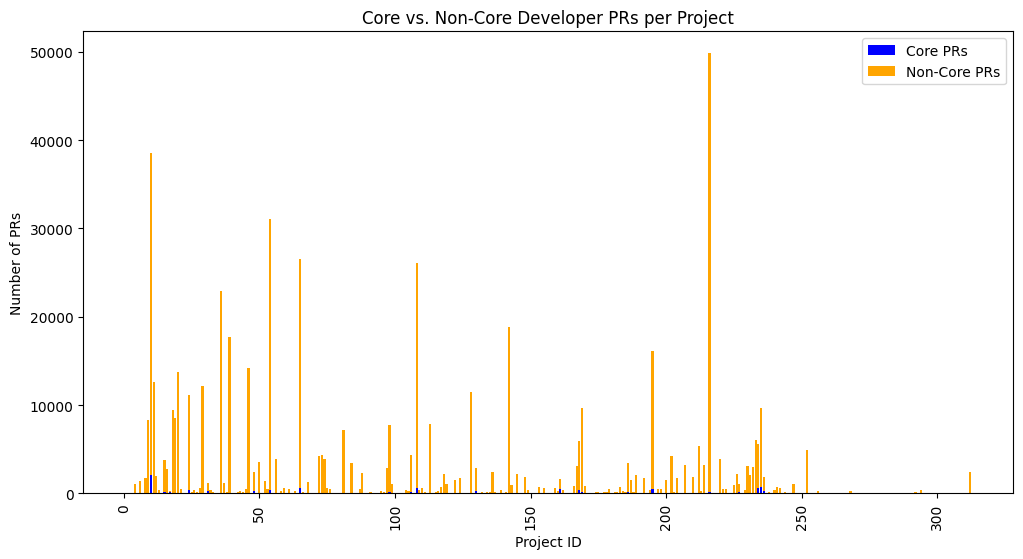

In [50]:
# Set figure size
plt.figure(figsize=(12, 6))

# Stacked bar chart
plt.bar(pr_counts_per_project['project_id'], pr_counts_per_project['Core PRs'], label='Core PRs', color='blue')
plt.bar(pr_counts_per_project['project_id'], pr_counts_per_project['Non-Core PRs'], bottom=pr_counts_per_project['Core PRs'], label='Non-Core PRs', color='orange')

# Labels and title
plt.xlabel('Project ID')
plt.ylabel('Number of PRs')
plt.title('Core vs. Non-Core Developer PRs per Project')
plt.xticks(rotation=90)  # Rotate x-axis labels if necessary
plt.legend()
plt.show()


**Merged and Closed PRs by Core and Non-core developers**

In [51]:
# Count merged and closed PRs for core developers
core_pr_status_counts = df[df['Core_Developer'] == 'Yes']['pr_status'].value_counts()

# Count merged and closed PRs for non-core developers
non_core_pr_status_counts = df[df['Core_Developer'] == 'No']['pr_status'].value_counts()

# Display results
print("Core Developer PR Status Counts:")
print(core_pr_status_counts)

print("\nNon-Core Developer PR Status Counts:")
print(non_core_pr_status_counts)

Core Developer PR Status Counts:
pr_status
Merged    6596
Closed    3402
Open        45
Name: count, dtype: int64

Non-Core Developer PR Status Counts:
pr_status
Merged    349186
Closed    198899
Open       11320
Name: count, dtype: int64


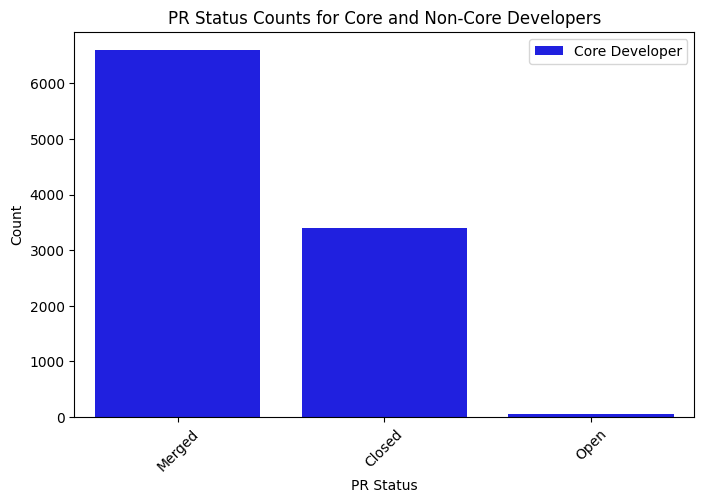

In [52]:
# Combine the data into a single DataFrame for easy plotting
pr_status_df = pd.DataFrame({
    'Core Developer': core_pr_status_counts,
    'Non-Core Developer': non_core_pr_status_counts
}).fillna(0)  # Fill missing values with 0

# Reset index for seaborn compatibility
pr_status_df = pr_status_df.reset_index().rename(columns={'index': 'PR Status'})

# Plot
plt.figure(figsize=(8, 5))
sns.barplot(x='pr_status', y='Core Developer', data=pr_status_df, color='blue', label='Core Developer')
# sns.barplot(x='pr_status', y='Non-Core Developer', data=pr_status_df, color='orange', label='Non-Core Developer')

# Labels and legend
plt.xlabel('PR Status')
plt.ylabel('Count')
plt.title('PR Status Counts for Core and Non-Core Developers')
plt.legend()
plt.xticks(rotation=45)  # Rotate labels if necessary
plt.show()

**Check if PRs by core developers have a higher merge rate:**

In [53]:
# Total PRs by core and non-core developers
core_total_prs = df[df['Core_Developer'] == 'Yes'].shape[0]
non_core_total_prs = df[df['Core_Developer'] == 'No'].shape[0]

# Merged PRs by core and non-core developers
core_merged_prs = df[(df['Core_Developer'] == 'Yes') & (df['pr_status'] == 'Merged')].shape[0]
non_core_merged_prs = df[(df['Core_Developer'] == 'No') & (df['pr_status'] == 'Merged')].shape[0]

# Merge rates in percentage
core_merge_rate = (core_merged_prs / core_total_prs) * 100 if core_total_prs > 0 else 0
non_core_merge_rate = (non_core_merged_prs / non_core_total_prs) * 100 if non_core_total_prs > 0 else 0

# Display results
print(f"Core Developer Merge Rate: {core_merge_rate:.2f}%")
print(f"Non-Core Developer Merge Rate: {non_core_merge_rate:.2f}%")

Core Developer Merge Rate: 65.68%
Non-Core Developer Merge Rate: 62.42%


/tmp/ipykernel_262460/375020999.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=list(merge_rates.keys()), y=list(merge_rates.values()), palette=['blue', 'orange'])


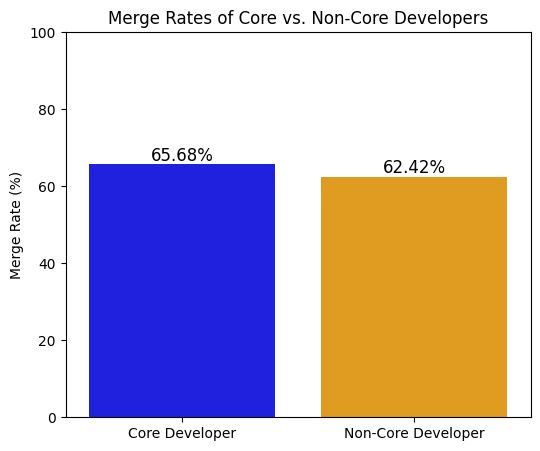

In [54]:
# Data for visualization
merge_rates = {'Core Developer': core_merge_rate, 'Non-Core Developer': non_core_merge_rate}

# Bar plot
plt.figure(figsize=(6, 5))
sns.barplot(x=list(merge_rates.keys()), y=list(merge_rates.values()), palette=['blue', 'orange'])

# Labels and title
plt.ylabel('Merge Rate (%)')
plt.title('Merge Rates of Core vs. Non-Core Developers')
plt.ylim(0, 100)  # Ensures the y-axis represents percentage properly

# Display values on bars
for i, rate in enumerate(merge_rates.values()):
    plt.text(i, rate + 1, f"{rate:.2f}%", ha='center', fontsize=12)

plt.show()

In [55]:
# Total PRs by core and non-core developers
core_total_prs = df[df['Core_Developer'] == 'Yes'].shape[0]
non_core_total_prs = df[df['Core_Developer'] == 'No'].shape[0]

# Closed PRs by core and non-core developers
core_merged_prs = df[(df['Core_Developer'] == 'Yes') & (df['pr_status'] == 'Closed')].shape[0]
non_core_merged_prs = df[(df['Core_Developer'] == 'No') & (df['pr_status'] == 'Closed')].shape[0]

# Close rates in percentage
core_merge_rate = (core_merged_prs / core_total_prs) * 100 if core_total_prs > 0 else 0
non_core_merge_rate = (non_core_merged_prs / non_core_total_prs) * 100 if non_core_total_prs > 0 else 0

# Display results
print(f"Core Developer Closed Rate: {core_merge_rate:.2f}%")
print(f"Non-Core Developer Closed Rate: {non_core_merge_rate:.2f}%")

Core Developer Closed Rate: 33.87%
Non-Core Developer Closed Rate: 35.56%


/tmp/ipykernel_262460/3761357606.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=list(merge_rates.keys()), y=list(merge_rates.values()), palette=['blue', 'orange'])


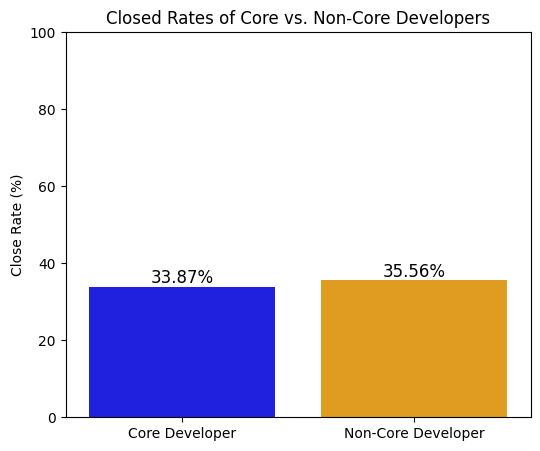

In [56]:
# Data for visualization
merge_rates = {'Core Developer': core_merge_rate, 'Non-Core Developer': non_core_merge_rate}

# Bar plot
plt.figure(figsize=(6, 5))
sns.barplot(x=list(merge_rates.keys()), y=list(merge_rates.values()), palette=['blue', 'orange'])

# Labels and title
plt.ylabel('Close Rate (%)')
plt.title('Closed Rates of Core vs. Non-Core Developers')
plt.ylim(0, 100)  # Ensures the y-axis represents percentage properly

# Display values on bars
for i, rate in enumerate(merge_rates.values()):
    plt.text(i, rate + 1, f"{rate:.2f}%", ha='center', fontsize=12)

plt.show()

In [57]:
# Total PRs by core and non-core developers
core_total_prs = df[df['Core_Developer'] == 'Yes'].shape[0]
non_core_total_prs = df[df['Core_Developer'] == 'No'].shape[0]

# Closed PRs by core and non-core developers
core_merged_prs = df[(df['Core_Developer'] == 'Yes') & (df['pr_status'] == 'Open')].shape[0]
non_core_merged_prs = df[(df['Core_Developer'] == 'No') & (df['pr_status'] == 'Open')].shape[0]

# Close rates in percentage
core_merge_rate = (core_merged_prs / core_total_prs) * 100 if core_total_prs > 0 else 0
non_core_merge_rate = (non_core_merged_prs / non_core_total_prs) * 100 if non_core_total_prs > 0 else 0

# Display results
print(f"Core Developer PR Pending Rate: {core_merge_rate:.2f}%")
print(f"Non-Core Developer PR Pending Rate: {non_core_merge_rate:.2f}%")

Core Developer PR Pending Rate: 0.45%
Non-Core Developer PR Pending Rate: 2.02%


/tmp/ipykernel_262460/2690127885.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=list(merge_rates.keys()), y=list(merge_rates.values()), palette=['blue', 'orange'])


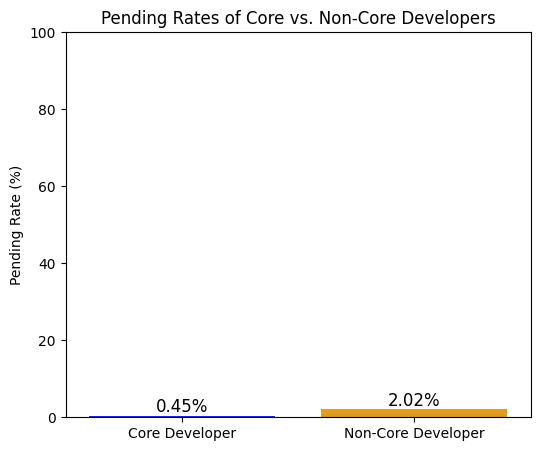

In [58]:
# Data for visualization
merge_rates = {'Core Developer': core_merge_rate, 'Non-Core Developer': non_core_merge_rate}

# Bar plot
plt.figure(figsize=(6, 5))
sns.barplot(x=list(merge_rates.keys()), y=list(merge_rates.values()), palette=['blue', 'orange'])

# Labels and title
plt.ylabel('Pending Rate (%)')
plt.title('Pending Rates of Core vs. Non-Core Developers')
plt.ylim(0, 100)  # Ensures the y-axis represents percentage properly

# Display values on bars
for i, rate in enumerate(merge_rates.values()):
    plt.text(i, rate + 1, f"{rate:.2f}%", ha='center', fontsize=12)

plt.show()

**We want to work with Graduated=Sustainable=1 and Retired=Unsustainable=2 projects here. So, we ignore the In-Incubation=0 project_status columns**

In [59]:
# Drop rows where project_status is 0
df = df[df['project_status'] != 0]

In [60]:
df.shape

(378229, 13)

In [10]:
# Total PRs in Sustainable (1) and Unsustainable (2) projects
total_prs_sustainable = df[df['project_status'] == 1].shape[0]
total_prs_unsustainable = df[df['project_status'] == 2].shape[0]

# PRs by core developers in each category
core_prs_sustainable = df[(df['Core_Developer'] == 'Yes') & (df['project_status'] == 1)].shape[0]
core_prs_unsustainable = df[(df['Core_Developer'] == 'Yes') & (df['project_status'] == 2)].shape[0]

# Percentage of PRs by core developers
core_pr_percentage_sustainable = (core_prs_sustainable / total_prs_sustainable) * 100 if total_prs_sustainable > 0 else 0
core_pr_percentage_unsustainable = (core_prs_unsustainable / total_prs_unsustainable) * 100 if total_prs_unsustainable > 0 else 0

# Display results
print(f"Percentage of PRs by Core Developers in Sustainable Projects: {core_pr_percentage_sustainable:.2f}%")
print(f"Percentage of PRs by Core Developers in Unsustainable Projects: {core_pr_percentage_unsustainable:.2f}%")

Percentage of PRs by Core Developers in Sustainable Projects: 1.72%
Percentage of PRs by Core Developers in Unsustainable Projects: 3.49%


In [12]:
core_prs_sustainable

6443

/tmp/ipykernel_262460/1416041667.py:12: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=list(core_pr_percentages.keys()), y=list(core_pr_percentages.values()), palette=['green', 'red'])


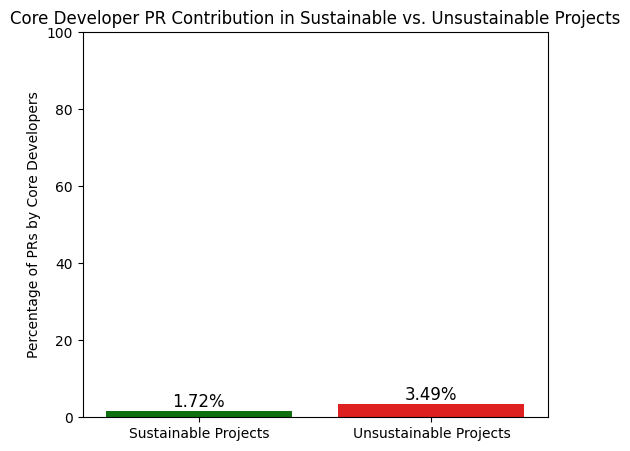

In [62]:
import matplotlib.pyplot as plt
import seaborn as sns

# Data for visualization
core_pr_percentages = {
    'Sustainable Projects': core_pr_percentage_sustainable,
    'Unsustainable Projects': core_pr_percentage_unsustainable
}

# Create bar plot
plt.figure(figsize=(6, 5))
sns.barplot(x=list(core_pr_percentages.keys()), y=list(core_pr_percentages.values()), palette=['green', 'red'])

# Labels and title
plt.ylabel('Percentage of PRs by Core Developers')
plt.title('Core Developer PR Contribution in Sustainable vs. Unsustainable Projects')
plt.ylim(0, 100)  # Y-axis limit set to percentage scale

# Display values on bars
for i, percentage in enumerate(core_pr_percentages.values()):
    plt.text(i, percentage + 1, f"{percentage:.2f}%", ha='center', fontsize=12)

plt.show()


In [21]:
print(total_prs_unsustainable)
print(core_prs_unsustainable)
print(core_pr_percentage_unsustainable)

3729
130
3.486189326897292


In [63]:
# Total PRs in Sustainable (1) and Unsustainable (2) projects
total_prs_sustainable = df[df['project_status'] == 1].shape[0]
total_prs_unsustainable = df[df['project_status'] == 2].shape[0]

# PRs by core developers in each category
core_prs_sustainable = df[(df['Core_Developer'] == 'No') & (df['project_status'] == 1)].shape[0]
core_prs_unsustainable = df[(df['Core_Developer'] == 'No') & (df['project_status'] == 2)].shape[0]

# Percentage of PRs by non-core developers
core_pr_percentage_sustainable = (core_prs_sustainable / total_prs_sustainable) * 100 if total_prs_sustainable > 0 else 0
core_pr_percentage_unsustainable = (core_prs_unsustainable / total_prs_unsustainable) * 100 if total_prs_unsustainable > 0 else 0

# Display results
print(f"Percentage of PRs by Non-Core Developers in Sustainable Projects: {core_pr_percentage_sustainable:.2f}%")
print(f"Percentage of PRs by Non-Core Developers in Unsustainable Projects: {core_pr_percentage_unsustainable:.2f}%")


Percentage of PRs by Non-Core Developers in Sustainable Projects: 98.28%
Percentage of PRs by Non-Core Developers in Unsustainable Projects: 96.51%


/tmp/ipykernel_262460/1008555705.py:12: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=list(core_pr_percentages.keys()), y=list(core_pr_percentages.values()), palette=['green', 'red'])


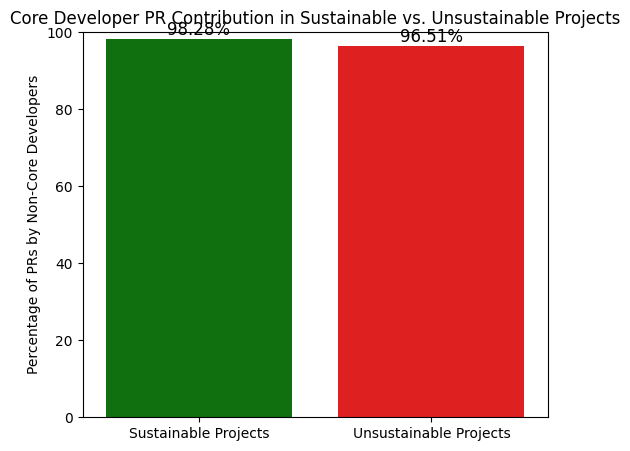

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

# Data for visualization
core_pr_percentages = {
    'Sustainable Projects': core_pr_percentage_sustainable,
    'Unsustainable Projects': core_pr_percentage_unsustainable
}

# Create bar plot
plt.figure(figsize=(6, 5))
sns.barplot(x=list(core_pr_percentages.keys()), y=list(core_pr_percentages.values()), palette=['green', 'red'])

# Labels and title
plt.ylabel('Percentage of PRs by Non-Core Developers')
plt.title('Non-Core Developer PR Contribution in Sustainable vs. Unsustainable Projects')
plt.ylim(0, 100)  # Y-axis limit set to percentage scale

# Display values on bars
for i, percentage in enumerate(core_pr_percentages.values()):
    plt.text(i, percentage + 1, f"{percentage:.2f}%", ha='center', fontsize=12)

plt.show()

In [24]:
print(total_prs_sustainable)
print(core_prs_sustainable)
print(core_pr_percentage_sustainable)

374500
368057
98.27957276368491


In [65]:
# Total PRs by core developers in sustainable and unsustainable projects
core_total_prs_sustainable = df[(df['Core_Developer'] == 'Yes') & (df['project_status'] == 1)].shape[0]
core_total_prs_unsustainable = df[(df['Core_Developer'] == 'Yes') & (df['project_status'] == 2)].shape[0]

# Merged PRs by core developers in each category
core_merged_prs_sustainable = df[(df['Core_Developer'] == 'Yes') & 
                                 (df['project_status'] == 1) & 
                                 (df['pr_status'] == 'Merged')].shape[0]

core_merged_prs_unsustainable = df[(df['Core_Developer'] == 'Yes') & 
                                   (df['project_status'] == 2) & 
                                   (df['pr_status'] == 'Merged')].shape[0]

# Merge rate as percentage
core_merge_rate_sustainable = (core_merged_prs_sustainable / core_total_prs_sustainable) * 100 if core_total_prs_sustainable > 0 else 0
core_merge_rate_unsustainable = (core_merged_prs_unsustainable / core_total_prs_unsustainable) * 100 if core_total_prs_unsustainable > 0 else 0

# Display results
print(f"Percentage of Merged PRs by Core Developers in Sustainable Projects: {core_merge_rate_sustainable:.2f}%")
print(f"Percentage of Merged PRs by Core Developers in Unsustainable Projects: {core_merge_rate_unsustainable:.2f}%")


Percentage of Merged PRs by Core Developers in Sustainable Projects: 55.64%
Percentage of Merged PRs by Core Developers in Unsustainable Projects: 86.15%


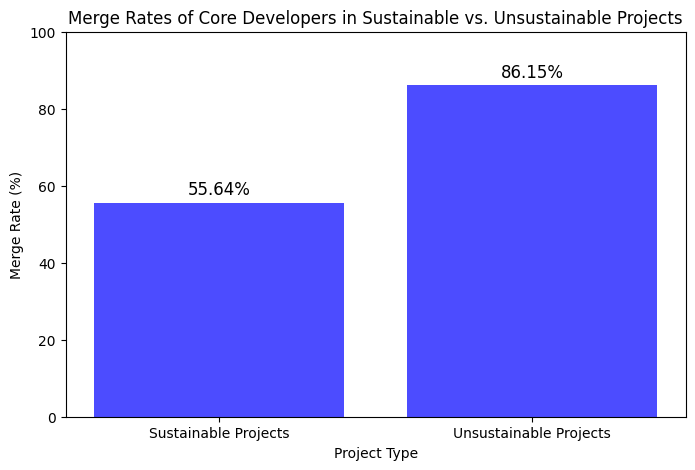

In [67]:
# Data for visualization
projects = ['Sustainable Projects', 'Unsustainable Projects']
core_merge_rates = [core_merge_rate_sustainable, core_merge_rate_unsustainable]

# Create bar chart
plt.figure(figsize=(8, 5))
plt.bar(projects, core_merge_rates, color='blue', alpha=0.7)

# Labels and title
plt.xlabel('Project Type')
plt.ylabel('Merge Rate (%)')
plt.title('Merge Rates of Core Developers in Sustainable vs. Unsustainable Projects')

# Display values on bars
for i, rate in enumerate(core_merge_rates):
    plt.text(i, rate + 2, f'{rate:.2f}%', ha='center', fontsize=12)

plt.ylim(0, 100)  # Ensure the y-axis represents percentage properly
plt.show()


In [68]:
# Total PRs by core developers in sustainable and unsustainable projects
core_total_prs_sustainable = df[(df['Core_Developer'] == 'Yes') & (df['project_status'] == 1)].shape[0]
core_total_prs_unsustainable = df[(df['Core_Developer'] == 'Yes') & (df['project_status'] == 2)].shape[0]

# Closed PRs by core developers in each category
core_merged_prs_sustainable = df[(df['Core_Developer'] == 'Yes') & 
                                 (df['project_status'] == 1) & 
                                 (df['pr_status'] == 'Closed')].shape[0]

core_merged_prs_unsustainable = df[(df['Core_Developer'] == 'Yes') & 
                                   (df['project_status'] == 2) & 
                                   (df['pr_status'] == 'Closed')].shape[0]

# Closed rate as percentage
core_merge_rate_sustainable = (core_merged_prs_sustainable / core_total_prs_sustainable) * 100 if core_total_prs_sustainable > 0 else 0
core_merge_rate_unsustainable = (core_merged_prs_unsustainable / core_total_prs_unsustainable) * 100 if core_total_prs_unsustainable > 0 else 0

# Display results
print(f"Percentage of Closed PRs by Core Developers in Sustainable Projects: {core_merge_rate_sustainable:.2f}%")
print(f"Percentage of Closed PRs by Core Developers in Unsustainable Projects: {core_merge_rate_unsustainable:.2f}%")

Percentage of Closed PRs by Core Developers in Sustainable Projects: 44.02%
Percentage of Closed PRs by Core Developers in Unsustainable Projects: 13.08%


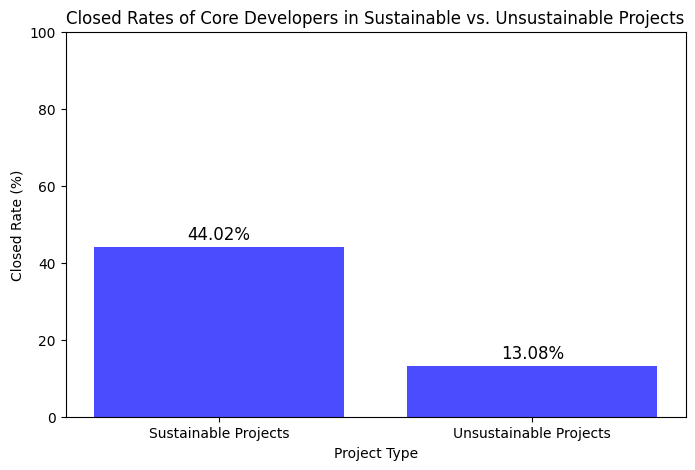

In [69]:
# Data for visualization
projects = ['Sustainable Projects', 'Unsustainable Projects']
core_merge_rates = [core_merge_rate_sustainable, core_merge_rate_unsustainable]

# Create bar chart
plt.figure(figsize=(8, 5))
plt.bar(projects, core_merge_rates, color='blue', alpha=0.7)

# Labels and title
plt.xlabel('Project Type')
plt.ylabel('Closed Rate (%)')
plt.title('Closed Rates of Core Developers in Sustainable vs. Unsustainable Projects')

# Display values on bars
for i, rate in enumerate(core_merge_rates):
    plt.text(i, rate + 2, f'{rate:.2f}%', ha='center', fontsize=12)

plt.ylim(0, 100)  # Ensure the y-axis represents percentage properly
plt.show()

In [70]:
# Total PRs by core developers in sustainable and unsustainable projects
core_total_prs_sustainable = df[(df['Core_Developer'] == 'Yes') & (df['project_status'] == 1)].shape[0]
core_total_prs_unsustainable = df[(df['Core_Developer'] == 'Yes') & (df['project_status'] == 2)].shape[0]

# Closed PRs by core developers in each category
core_merged_prs_sustainable = df[(df['Core_Developer'] == 'Yes') & 
                                 (df['project_status'] == 1) & 
                                 (df['pr_status'] == 'Open')].shape[0]

core_merged_prs_unsustainable = df[(df['Core_Developer'] == 'Yes') & 
                                   (df['project_status'] == 2) & 
                                   (df['pr_status'] == 'Open')].shape[0]

# Closed rate as percentage
core_merge_rate_sustainable = (core_merged_prs_sustainable / core_total_prs_sustainable) * 100 if core_total_prs_sustainable > 0 else 0
core_merge_rate_unsustainable = (core_merged_prs_unsustainable / core_total_prs_unsustainable) * 100 if core_total_prs_unsustainable > 0 else 0

# Display results
print(f"Percentage of Pending PRs by Core Developers in Sustainable Projects: {core_merge_rate_sustainable:.2f}%")
print(f"Percentage of Pending PRs by Core Developers in Unsustainable Projects: {core_merge_rate_unsustainable:.2f}%")

Percentage of Pending PRs by Core Developers in Sustainable Projects: 0.34%
Percentage of Pending PRs by Core Developers in Unsustainable Projects: 0.77%


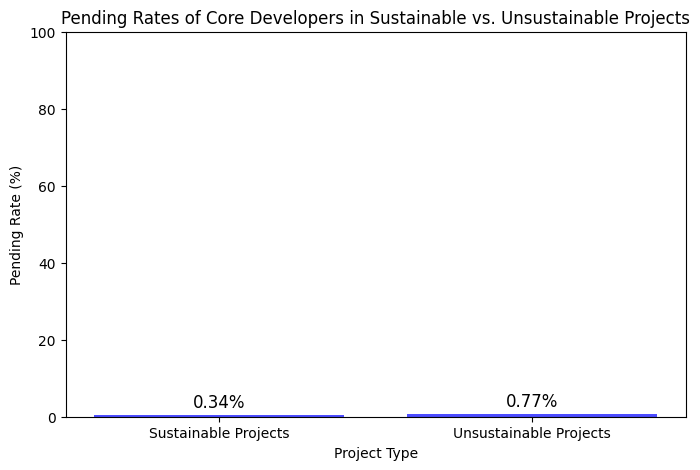

In [71]:
# Data for visualization
projects = ['Sustainable Projects', 'Unsustainable Projects']
core_merge_rates = [core_merge_rate_sustainable, core_merge_rate_unsustainable]

# Create bar chart
plt.figure(figsize=(8, 5))
plt.bar(projects, core_merge_rates, color='blue', alpha=0.7)

# Labels and title
plt.xlabel('Project Type')
plt.ylabel('Pending Rate (%)')
plt.title('Pending Rates of Core Developers in Sustainable vs. Unsustainable Projects')

# Display values on bars
for i, rate in enumerate(core_merge_rates):
    plt.text(i, rate + 2, f'{rate:.2f}%', ha='center', fontsize=12)

plt.ylim(0, 100)  # Ensure the y-axis represents percentage properly
plt.show()

**No. of PRs per project**

In [28]:
project_activity = df.groupby('project_name').size().sort_values(ascending=False)
project_activity

project_name
spark           49822
airflow         31065
beam            26496
flink           26113
kafka           18840
                ...  
spamassassin        2
nuvem               2
tashi               2
mrunit              1
hdt                 1
Length: 206, dtype: int64

**Find projects with the most core developers:**

In [29]:
df.groupby('project_name')['Core_Developer'].apply(lambda x: (x == 'Yes').sum()).sort_values(ascending=False)

project_name
trafficserver       706
beam                632
flink               594
trafficcontrol      559
pulsar              470
                   ... 
iota                  0
jena                  0
joshua                0
jspwiki               0
guacamole-client      0
Name: Core_Developer, Length: 206, dtype: int64

In [76]:
import pandas as pd

# Convert date columns to datetime format
df['created_at'] = pd.to_datetime(df['created_at'])
df['merged_at'] = pd.to_datetime(df['merged_at'])
df['closed_at'] = pd.to_datetime(df['closed_at'])

# Calculate time to acceptance/rejection in days
df['pr_lifetime'] = df.apply(lambda row: (row['merged_at'] - row['created_at']).days 
                             if pd.notnull(row['merged_at']) 
                             else (row['closed_at'] - row['created_at']).days 
                             if pd.notnull(row['closed_at']) 
                             else None, axis=1)

# Compute the average time (in days)
average_pr_time = df['pr_lifetime'].mean()

print(f"Average time to PR acceptance/rejection: {average_pr_time:.2f} days")


Average time to PR acceptance/rejection: 37.40 days


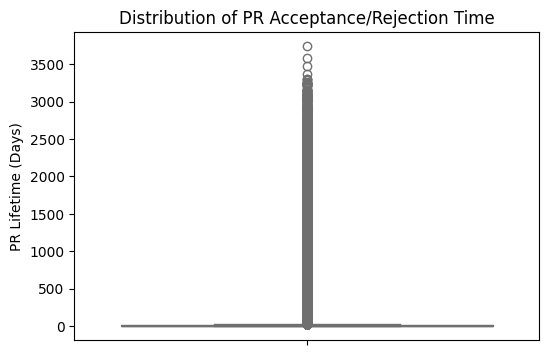

In [77]:
import matplotlib.pyplot as plt
import seaborn as sns

# Create the boxplot
plt.figure(figsize=(6, 4))
sns.boxplot(y=df['pr_lifetime'], color='skyblue')

# Add labels and title
plt.ylabel('PR Lifetime (Days)')
plt.title('Distribution of PR Acceptance/Rejection Time')

# Show the plot
plt.show()


In [78]:
import pandas as pd

# Convert date columns to datetime format
df['created_at'] = pd.to_datetime(df['created_at'])
df['merged_at'] = pd.to_datetime(df['merged_at'])
df['closed_at'] = pd.to_datetime(df['closed_at'])

# Calculate time to acceptance/rejection in days
df['pr_lifetime'] = df.apply(lambda row: (row['merged_at'] - row['created_at']).days 
                             if pd.notnull(row['merged_at']) 
                             else (row['closed_at'] - row['created_at']).days 
                             if pd.notnull(row['closed_at']) 
                             else None, axis=1)

# Calculate the average PR time for sustainable (1) and unsustainable (2) projects
average_pr_time_sustainable = df[df['project_status'] == 1]['pr_lifetime'].mean()
average_pr_time_unsustainable = df[df['project_status'] == 2]['pr_lifetime'].mean()

print(f"Average time to PR acceptance/rejection in sustainable projects: {average_pr_time_sustainable:.2f} days")
print(f"Average time to PR acceptance/rejection in unsustainable projects: {average_pr_time_unsustainable:.2f} days")


Average time to PR acceptance/rejection in sustainable projects: 37.60 days
Average time to PR acceptance/rejection in unsustainable projects: 17.47 days


/tmp/ipykernel_262460/2785951352.py:9: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x=df_filtered['project_status'], y=df_filtered['pr_lifetime'], palette=['lightgreen', 'salmon'])


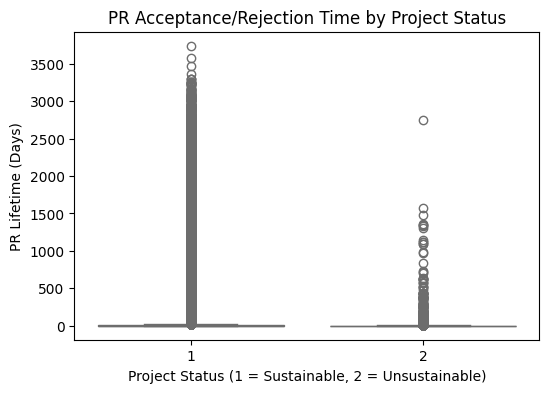

In [79]:
import matplotlib.pyplot as plt
import seaborn as sns

# Filter out rows where pr_lifetime is NaN
df_filtered = df.dropna(subset=['pr_lifetime'])

# Create the boxplot
plt.figure(figsize=(6, 4))
sns.boxplot(x=df_filtered['project_status'], y=df_filtered['pr_lifetime'], palette=['lightgreen', 'salmon'])

# Add labels and title
plt.xlabel('Project Status (1 = Sustainable, 2 = Unsustainable)')
plt.ylabel('PR Lifetime (Days)')
plt.title('PR Acceptance/Rejection Time by Project Status')

# Show the plot
plt.show()


In [80]:
import pandas as pd

# Convert date columns to datetime format
df['created_at'] = pd.to_datetime(df['created_at'])
df['merged_at'] = pd.to_datetime(df['merged_at'])
df['closed_at'] = pd.to_datetime(df['closed_at'])

# Calculate time to acceptance/rejection in days
df['pr_lifetime'] = df.apply(lambda row: (row['merged_at'] - row['created_at']).days 
                             if pd.notnull(row['merged_at']) 
                             else (row['closed_at'] - row['created_at']).days 
                             if pd.notnull(row['closed_at']) 
                             else None, axis=1)

# Calculate the average PR time for Core Developers ('Yes') and Non-Core Developers ('No')
average_pr_time_core_dev = df[df['Core_Developer'] == 'Yes']['pr_lifetime'].mean()
average_pr_time_non_core_dev = df[df['Core_Developer'] == 'No']['pr_lifetime'].mean()

print(f"Average time to PR acceptance/rejection for Core Developers: {average_pr_time_core_dev:.2f} days")
print(f"Average time to PR acceptance/rejection for Non-Core Developers: {average_pr_time_non_core_dev:.2f} days")


Average time to PR acceptance/rejection for Core Developers: 12.45 days
Average time to PR acceptance/rejection for Non-Core Developers: 37.85 days


/tmp/ipykernel_262460/1404442122.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.violinplot(x=df_filtered['Core_Developer'], y=df_filtered['pr_lifetime'], palette=['lightblue', 'orange'])


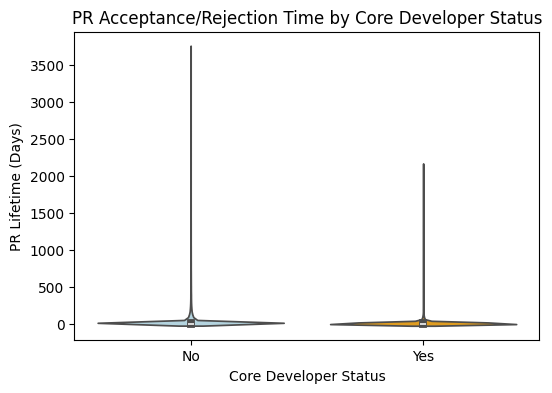

In [82]:
plt.figure(figsize=(6, 4))
sns.violinplot(x=df_filtered['Core_Developer'], y=df_filtered['pr_lifetime'], palette=['lightblue', 'orange'])
plt.xlabel('Core Developer Status')
plt.ylabel('PR Lifetime (Days)')
plt.title('PR Acceptance/Rejection Time by Core Developer Status')
plt.show()


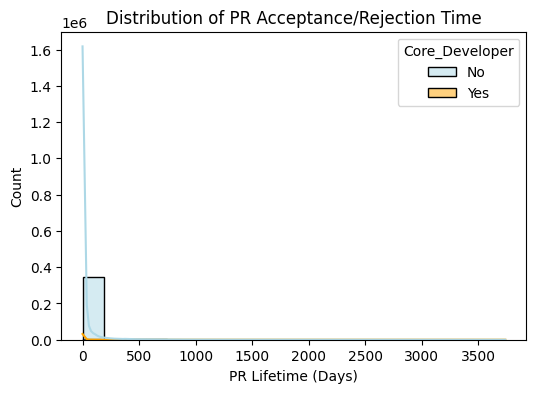

In [83]:
plt.figure(figsize=(6, 4))
sns.histplot(df_filtered, x='pr_lifetime', hue='Core_Developer', kde=True, bins=20, palette=['lightblue', 'orange'])
plt.xlabel('PR Lifetime (Days)')
plt.ylabel('Count')
plt.title('Distribution of PR Acceptance/Rejection Time')
plt.show()


/tmp/ipykernel_262460/3279741361.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=avg_pr_times.index, y=avg_pr_times.values, palette=['lightblue', 'orange'])


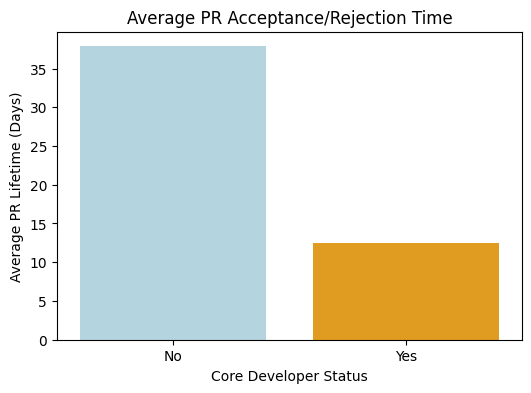

In [84]:
avg_pr_times = df_filtered.groupby('Core_Developer')['pr_lifetime'].mean()

plt.figure(figsize=(6, 4))
sns.barplot(x=avg_pr_times.index, y=avg_pr_times.values, palette=['lightblue', 'orange'])
plt.xlabel('Core Developer Status')
plt.ylabel('Average PR Lifetime (Days)')
plt.title('Average PR Acceptance/Rejection Time')
plt.show()
